# Imports

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import os

In [3]:
os.chdir('/content/drive/My Drive/CMPE256/Final_Project')
!ls

soc-redditHyperlinks-body.tsv  soc-redditHyperlinks-title.tsv


# Data Exploration and Preprocessing

In [4]:
title_data = pd.read_csv('soc-redditHyperlinks-title.tsv', sep = '\t')
body_data = pd.read_csv('soc-redditHyperlinks-body.tsv', sep='\t')

In [5]:
title_data

,SOURCE_SUBREDDIT,TARGET_SUBREDDIT,POST_ID,TIMESTAMP,LINK_SENTIMENT,PROPERTIES
0,rddtgaming,rddtrust,1u4pzzs,2013-12-31 16:39:18,1,"25.0,23.0,0.76,0.0,0.44,0.12,0.12,4.0,4.0,0.0,..."
1,xboxone,battlefield_4,1u4tmfs,2013-12-31 17:59:11,1,"100.0,88.0,0.78,0.02,0.08,0.13,0.07,16.0,16.0,..."
2,ps4,battlefield_4,1u4tmos,2013-12-31 17:59:40,1,"100.0,88.0,0.78,0.02,0.08,0.13,0.07,16.0,16.0,..."
3,fitnesscirclejerk,leangains,1u50xfs,2013-12-31 19:01:56,1,"49.0,43.0,0.775510204082,0.0,0.265306122449,0...."
4,fitnesscirclejerk,lifeprotips,1u51nps,2013-12-31 21:02:28,1,"14.0,14.0,0.785714285714,0.0,0.428571428571,0...."
...,...,...,...,...,...,...
571922,seattleshitshow,seattlewa,68iptp,2017-04-27 11:07:31,-1,"83.0,70.0,0.78313253012,0.0,0.10843373494,0.16..."
571923,peoplewhosayheck,spiderman,68iqh6s,2017-04-30 16:36:07,1,"121.0,105.0,0.719008264463,0.0165289256198,0.0..."
571924,vzla,wtf,68iqkcs,2017-04-30 15:50:07,1,"68.0,58.0,0.764705882353,0.0,0.147058823529,0...."
571925,denverbroncos,nfl,68iqt8,2017-04-30 16:11:30,-1,"96.0,79.0,0.770833333333,0.0,0.0729166666667,0..."


In [6]:
temp = title_data[title_data['SOURCE_SUBREDDIT'] == 'ps4']
temp[temp['TARGET_SUBREDDIT'] == 'xboxone']

,SOURCE_SUBREDDIT,TARGET_SUBREDDIT,POST_ID,TIMESTAMP,LINK_SENTIMENT,PROPERTIES
8107,ps4,xboxone,1wdqiws,2014-01-28 08:52:51,1,"86.0,74.0,0.790697674419,0.0116279069767,0.255..."
11412,ps4,xboxone,1xasy0s,2014-02-07 12:28:25,1,"29.0,26.0,0.827586206897,0.0,0.206896551724,0...."
12962,ps4,xboxone,1xqj3vs,2014-02-12 12:20:51,1,"85.0,73.0,0.8,0.0,0.0941176470588,0.1529411764..."
50536,ps4,xboxone,279mgzs,2014-06-03 22:38:39,1,"108.0,94.0,0.768518518519,0.0,0.101851851852,0..."
68551,ps4,xboxone,2bncsns,2014-07-24 18:40:41,1,"57.0,48.0,0.771929824561,0.0175438596491,0.192..."
79663,ps4,xboxone,2eeq5ns,2014-08-23 19:01:17,1,"90.0,78.0,0.822222222222,0.0,0.233333333333,0...."
80151,ps4,xboxone,2ej7vns,2014-08-25 08:48:51,1,"104.0,92.0,0.788461538462,0.0,0.125,0.125,0.08..."
99498,ps4,xboxone,2jdd8qs,2014-10-15 18:15:44,1,"139.0,116.0,0.784172661871,0.0,0.107913669065,..."
119479,ps4,xboxone,2olpaxs,2014-12-07 17:35:06,1,"122.0,105.0,0.795081967213,0.0,0.0901639344262..."
141629,ps4,xboxone,2ul0i9s,2015-02-02 17:05:29,1,"43.0,38.0,0.790697674419,0.0,0.139534883721,0...."


In [7]:
title_data['SOURCE_SUBREDDIT'].value_counts()

subredditdrama         22971
bestof                 21170
titlegore               9500
shitredditsays          7338
shitpost                6657
                       ...  
teaganpresley              1
ethankun                   1
nofapwarrebooted           1
runofthemillstories        1
javaone                    1
Name: SOURCE_SUBREDDIT, Length: 43695, dtype: int64

In [8]:
title_data['SOURCE_SUBREDDIT'].value_counts().shape

(43695,)

In [9]:
title_data['TARGET_SUBREDDIT'].value_counts()

askreddit         19293
pics               9799
iama               9752
todayilearned      8753
funny              8731
                  ...  
freecad               1
pantsuitnation        1
urshowtv              1
helmet                1
chubbydudes           1
Name: TARGET_SUBREDDIT, Length: 26888, dtype: int64

In [10]:
len(pd.unique(title_data['SOURCE_SUBREDDIT']))

43695

In [11]:
len(pd.unique(title_data['TARGET_SUBREDDIT']))

26888

In [12]:
len(pd.unique(title_data[['SOURCE_SUBREDDIT', 'TARGET_SUBREDDIT']].values.ravel('K')))

54075

There are 43695 unique source subreddits, 26888 unique target subreddits, with a total of 54075 combined unique subreddits.  

In [13]:
body_data

,SOURCE_SUBREDDIT,TARGET_SUBREDDIT,POST_ID,TIMESTAMP,LINK_SENTIMENT,PROPERTIES
0,leagueoflegends,teamredditteams,1u4nrps,2013-12-31 16:39:58,1,"345.0,298.0,0.75652173913,0.0173913043478,0.08..."
1,theredlion,soccer,1u4qkd,2013-12-31 18:18:37,-1,"101.0,98.0,0.742574257426,0.019801980198,0.049..."
2,inlandempire,bikela,1u4qlzs,2014-01-01 14:54:35,1,"85.0,85.0,0.752941176471,0.0235294117647,0.082..."
3,nfl,cfb,1u4sjvs,2013-12-31 17:37:55,1,"1124.0,949.0,0.772241992883,0.0017793594306,0...."
4,playmygame,gamedev,1u4w5ss,2014-01-01 02:51:13,1,"715.0,622.0,0.777622377622,0.00699300699301,0...."
...,...,...,...,...,...,...
286556,negareddit,debatefascism,68im20s,2017-04-30 16:31:26,1,"441.0,405.0,0.775510204082,0.0294784580499,0.0..."
286557,mildlynomil,justnomil,68imlas,2017-04-30 04:19:03,1,"2226.0,1855.0,0.786163522013,0.00224618149146,..."
286558,mmorpg,blackdesertonline,68ip5os,2017-04-30 16:54:08,1,"1100.0,909.0,0.778181818182,0.00181818181818,0..."
286559,electricskateboards,askreddit,68ipb2s,2017-04-30 16:41:53,1,"1876.0,1567.0,0.78144989339,0.00692963752665,0..."


Note that the PROPERTIES field contains a lot of comma separated values, but most of the values are fairly useless.  They contain dat such as word count, character count, whitespace, number of sentences, etc.  There are alsoo some AI classified subjects marked there, but those are also potentially unreliable.  Considering how many features exist, and how disparate the amount of information they may contain is, they will be ignored for the purposes of this project.  In a course with a greater emphasis on machine learning or classification, maybe these properties would be potentially more relevant.

In [14]:
body_data['SOURCE_SUBREDDIT'].value_counts()

subredditdrama          4665
circlebroke             2358
shitliberalssay         1968
outoftheloop            1958
copypasta               1824
                        ... 
queal                      1
nwjs                       1
dungeons_and_dragons       1
diablo3necromancer         1
realnyc                    1
Name: SOURCE_SUBREDDIT, Length: 27863, dtype: int64

In [15]:
body_data['TARGET_SUBREDDIT'].value_counts()

askreddit                7329
iama                     3694
pics                     2779
writingprompts           2490
videos                   2446
                         ... 
trailerparkboys             1
ugahousing                  1
fapstronauts                1
periwinklenewschannel       1
r2d8                        1
Name: TARGET_SUBREDDIT, Length: 20606, dtype: int64

In [16]:
len(pd.unique(body_data['SOURCE_SUBREDDIT']))

27863

In [17]:
len(pd.unique(body_data['TARGET_SUBREDDIT']))

20606

In [18]:
len(pd.unique(body_data[['SOURCE_SUBREDDIT', 'TARGET_SUBREDDIT']].values.ravel('K')))

35776

For body data, there are 27863 unique sources, and 20606 unique targets, for a total of 35776 unique subreddits.

In [19]:
title_subreddits = title_data[['SOURCE_SUBREDDIT', 'TARGET_SUBREDDIT']]
body_subreddits = body_data[['SOURCE_SUBREDDIT', 'TARGET_SUBREDDIT']]

These are all of the subreddits that are referenced

In [20]:
all_subreddits = pd.concat([title_subreddits, body_subreddits])

In [21]:
all_subreddits.apply(pd.Series.value_counts)

,SOURCE_SUBREDDIT,TARGET_SUBREDDIT
007,1.0,NaN
01001111010100000,NaN,1.0
0131,NaN,1.0
07scape,2.0,3.0
07thexpansion,1.0,NaN
...,...,...
zylooxwrites,4.0,NaN
zyramains,34.0,8.0
zyzz,3.0,NaN
zzseries,1.0,NaN


In [22]:
len(pd.unique(all_subreddits[['SOURCE_SUBREDDIT', 'TARGET_SUBREDDIT']].values.ravel('K')))

67180

According to pandas there are 67180 unique subreddits, not 55863 as the dataset stipulates.  I wonder where the discrepancy lies.

In [23]:
subreddit_references = all_subreddits.apply(pd.Series.value_counts).fillna(0)

In [24]:
subreddit_references["TOTAL_REFERENCES"] = subreddit_references.SOURCE_SUBREDDIT + subreddit_references.TARGET_SUBREDDIT

In [25]:
subreddit_references = subreddit_references.astype(int)

In [26]:
subreddit_references

,SOURCE_SUBREDDIT,TARGET_SUBREDDIT,TOTAL_REFERENCES
007,1,0,1
01001111010100000,0,1,1
0131,0,1,1
07scape,2,3,5
07thexpansion,1,0,1
...,...,...,...
zylooxwrites,4,0,4
zyramains,34,8,42
zyzz,3,0,3
zzseries,1,0,1


In [27]:
subreddit_references.sort_values(by=['TOTAL_REFERENCES'], ascending=False,inplace=True)

In [28]:
subreddit_references

,SOURCE_SUBREDDIT,TARGET_SUBREDDIT,TOTAL_REFERENCES
subredditdrama,27636,3507,31143
askreddit,1338,26622,27960
bestof,21170,1459,22629
iama,1187,13446,14633
pics,253,12578,12831
...,...,...,...
landlordadvice,1,0,1
landlordsupport,1,0,1
landofdustandthunder,1,0,1
landoffakes,0,1,1


In [29]:
subreddit_references['NEW_ID'] = np.arange(len(subreddit_references))

In [30]:
subreddit_references

,SOURCE_SUBREDDIT,TARGET_SUBREDDIT,TOTAL_REFERENCES,NEW_ID
subredditdrama,27636,3507,31143,0
askreddit,1338,26622,27960,1
bestof,21170,1459,22629,2
iama,1187,13446,14633,3
pics,253,12578,12831,4
...,...,...,...,...
landlordadvice,1,0,1,67175
landlordsupport,1,0,1,67176
landofdustandthunder,1,0,1,67177
landoffakes,0,1,1,67178


In [31]:
name_dict = subreddit_references.drop(['SOURCE_SUBREDDIT', 'TARGET_SUBREDDIT', 'TOTAL_REFERENCES'], axis=1).to_dict()

In [32]:
name_dict = name_dict['NEW_ID']

In [ ]:
name_dict

In [34]:
inv_name_dict = {v: k for k, v in name_dict.items()}

In [ ]:
inv_name_dict

In [36]:
title_data['SOURCE_SUBREDDIT'].map(name_dict)

0         24737
1           149
2           148
3            47
4            47
          ...  
571922     3033
571923      405
571924      720
571925      394
571926       91
Name: SOURCE_SUBREDDIT, Length: 571927, dtype: int64

In [37]:
title_data['TARGET_SUBREDDIT'].map(name_dict)

0         60679
1           625
2           625
3          2521
4           114
          ...  
571922      782
571923     3061
571924       24
571925       28
571926      203
Name: TARGET_SUBREDDIT, Length: 571927, dtype: int64

In [38]:
title_edge_df = pd.concat([title_data['SOURCE_SUBREDDIT'].map(name_dict), title_data['TARGET_SUBREDDIT'].map(name_dict), title_data['LINK_SENTIMENT']], axis=1)

In [39]:
body_edge_df = pd.concat([body_data['SOURCE_SUBREDDIT'].map(name_dict), body_data['TARGET_SUBREDDIT'].map(name_dict), body_data['LINK_SENTIMENT']], axis=1)

title_edge_df and body_edge_df are pandas dataframes of source to target with link sentiment, with subreddit names replaced with unique IDs that will also be used as indices into sparse matrix

In [40]:
title_edge_pos = title_edge_df[title_edge_df['LINK_SENTIMENT']==1]
title_edge_neg = title_edge_df[title_edge_df['LINK_SENTIMENT']==-1]

In [41]:
body_edge_pos = body_edge_df[body_edge_df['LINK_SENTIMENT']==1]
body_edge_neg = body_edge_df[body_edge_df['LINK_SENTIMENT']==-1]

# Setting up sparse matrix representation of link graph

In [42]:
from scipy.sparse import csr_matrix
from sklearn.metrics.pairwise import cosine_similarity

In [43]:
title_pos_matrix = csr_matrix((pd.Series.to_numpy(title_edge_pos.LINK_SENTIMENT), (pd.Series.to_numpy(title_edge_pos.SOURCE_SUBREDDIT), pd.Series.to_numpy(title_edge_pos.TARGET_SUBREDDIT))), shape=(67180,67180))

In [44]:
title_pos_matrix

<67180x67180 sparse matrix of type '<class 'numpy.longlong'>'
	with 221593 stored elements in Compressed Sparse Row format>

In [45]:
title_neg_matrix = csr_matrix((pd.Series.to_numpy(title_edge_neg.LINK_SENTIMENT), (pd.Series.to_numpy(title_edge_neg.SOURCE_SUBREDDIT), pd.Series.to_numpy(title_edge_neg.TARGET_SUBREDDIT))), shape=(67180,67180))

In [46]:
title_neg_matrix

<67180x67180 sparse matrix of type '<class 'numpy.longlong'>'
	with 29257 stored elements in Compressed Sparse Row format>

In [47]:
body_pos_matrix = csr_matrix((pd.Series.to_numpy(body_edge_pos.LINK_SENTIMENT), (pd.Series.to_numpy(body_edge_pos.SOURCE_SUBREDDIT), pd.Series.to_numpy(body_edge_pos.TARGET_SUBREDDIT))), shape=(67180,67180))

In [48]:
body_pos_matrix

<67180x67180 sparse matrix of type '<class 'numpy.longlong'>'
	with 130513 stored elements in Compressed Sparse Row format>

In [49]:
body_neg_matrix = csr_matrix((pd.Series.to_numpy(body_edge_neg.LINK_SENTIMENT), (pd.Series.to_numpy(body_edge_neg.SOURCE_SUBREDDIT), pd.Series.to_numpy(body_edge_neg.TARGET_SUBREDDIT))), shape=(67180,67180))

In [50]:
body_neg_matrix

<67180x67180 sparse matrix of type '<class 'numpy.longlong'>'
	with 14513 stored elements in Compressed Sparse Row format>

In [51]:
title_neg_matrix.min()

-107

In [52]:
title_pos_matrix[148, 149]

20

Checking that ps4->xboxone title sentiment is in fact 20, which we found out earlier.

In [53]:
title_sum_matrix = title_pos_matrix + title_neg_matrix
title_abs_matrix = title_pos_matrix + abs(title_neg_matrix)
body_sum_matrix = body_pos_matrix + body_neg_matrix
body_abs_matrix = body_pos_matrix + abs(body_neg_matrix)
overall_pos_matrix = title_pos_matrix + body_pos_matrix
overall_neg_matrix = title_neg_matrix + body_neg_matrix
overall_sum_matrix = overall_pos_matrix + overall_neg_matrix
overall_abs_matrix = overall_pos_matrix + abs(overall_neg_matrix)

There are a few derived ratings matrices we can create.


title_sum_matrix is simply the sum of all positive and negative sentiments from title references.  This means that a very controversial subreddit (many positive and negative mentions) will get a score very close to zero.  However, this may or may not be desirable, as this means a very popular subreddit with both positive and negative references is treated the same as a subreddit with no references at all, which probably makes little sense.  Similarly, this same thing is applied to comments dealing with the body as well in terms of body_sum_matrix, with the same corresponding problems.

title_abs_matrix and body_abs_matrix measures total engagement, which is to say, all references to another subreddit regardless of sentiment.  This is done by summing the absolute values of both positive and negative sentiments.  Of course, an argument can be made that with two subreddits of identical absolute engagement, the one with greater positive engagement should be what is recommended, so a more intelligent way to measure this may be some weighted average of positive engagement ratio along with overall engagement.

overall_pos_matrix and overall_neg_matrix combines the title and body engagements into one matrix, separated into positive and negative.  This gives an idea of the overally positive and negative relationships between two subreddits.

overall_sum_matrix and overall_abs_matrix calculate the sum of all links between subreddits (both title and body), both as a normal sum and as total engagement.  This suffers from the same problems as the individual title/body submatrices in terms of controversial subreddits, but likely gives a better overall picture as it includes both title and body.

In [54]:
title_pos_similarities = cosine_similarity(title_pos_matrix, dense_output=False)
title_neg_similarities = cosine_similarity(title_neg_matrix, dense_output=False)
body_pos_similarities = cosine_similarity(body_pos_matrix, dense_output=False)
body_neg_similarities = cosine_similarity(body_neg_matrix, dense_output=False)
title_sum_similarities = cosine_similarity(title_sum_matrix, dense_output=False)
title_abs_similarities = cosine_similarity(title_abs_matrix, dense_output=False)
body_sum_similarities = cosine_similarity(body_sum_matrix, dense_output=False)
body_abs_similarities = cosine_similarity(body_abs_matrix, dense_output=False)
overall_pos_similarities = cosine_similarity(overall_pos_matrix, dense_output=False)
overall_neg_similarities = cosine_similarity(overall_neg_matrix, dense_output=False)
overall_sum_similarities = cosine_similarity(overall_sum_matrix, dense_output=False)
overall_abs_similarities = cosine_similarity(overall_abs_matrix, dense_output=False)

We can calculate a cosine similarity matrix for each derived matrix as well.  Note that the colab machine reports that these matrices are taking up about 9GB of RAM, so even in an extremely simplified sparse matrix representation this graph is already starting to take large amounts of space.

In [55]:
title_pos_similarities

<67180x67180 sparse matrix of type '<class 'numpy.float64'>'
	with 57458473 stored elements in Compressed Sparse Row format>

There are 57,458,473 cosine similarities just for positive title sentiment

In [56]:
overall_abs_similarities

<67180x67180 sparse matrix of type '<class 'numpy.float64'>'
	with 100302845 stored elements in Compressed Sparse Row format>

There are 100,302,845 cosine similarities for overall sentiment.  That's a lot of relationships!

# Testing out cosine similarities between nodes

In [57]:
from scipy.sparse import coo_matrix

In [58]:
def sort_coo(m):
    tuples = zip(m.row, m.col, m.data)
    return sorted(tuples, key=lambda x: (x[0], x[2]), reverse=True)

def print_ordered(similarities, n):
  temp = []
  if len(similarities) > n+1:
    temp = similarities[:n+1]
  else:
    temp = similarities

  for _, target, simval in temp:
    print(inv_name_dict[target] + ' ' + str(simval))

def most_similar_title(subreddit, n):
  index = name_dict[subreddit]
  title_pos_ordered = sort_coo(coo_matrix(title_pos_similarities[index,:]))
  print('\nTitle Positive Similarities')
  print_ordered(title_pos_ordered, n)
  title_neg_ordered = sort_coo(coo_matrix(title_neg_similarities[index,:]))
  print('\nTitle Negative Similarities')
  print_ordered(title_neg_ordered, n)
  title_sum_ordered = sort_coo(coo_matrix(title_sum_similarities[index,:]))
  print('\nTitle Sum Similarities')
  print_ordered(title_sum_ordered, n)
  title_abs_ordered = sort_coo(coo_matrix(title_abs_similarities[index,:]))
  print('\nTitle Absolute Similarities')
  print_ordered(title_abs_ordered, n)

In [79]:
most_similar_title('bestof', 10)


Title Positive Similarities
bestof 1.0000000000000664
titlegore 0.7856521988680251
subredditdrama 0.7845811577897087
shitredditsays 0.7558006183615689
bestofx 0.7430871158943632
circlebroke2 0.7041395014273958
switcharoo 0.7007029547509753
negativewithgold 0.6859628169838068
shitamericanssay 0.6763794994744957
hailcorporate 0.6633676882958081
downvotesmcgoats 0.6285915500005943

Title Negative Similarities
bestof 0.9999999999999806
subredditdrama 0.7692511979509326
shitamericanssay 0.7204867812631529
circlebroke2 0.720453565879771
worstof 0.6775816393813526
hailcorporate 0.606118157469646
conspiracy 0.6055694762325968
drama 0.6054431802101261
switcharoo 0.6038641918390052
shitstatistssay 0.5961404583471542
agitation 0.5941316464555162

Title Sum Similarities
bestof 0.999999999999999
titlegore 0.7734626584850804
shitredditsays 0.7204829350432758
subredditdrama 0.7123948968763669
switcharoo 0.6825006150444906
negativewithgold 0.6546523262008791
circlebroke2 0.6538292208228091
hailcorpor

These are the 10 most similar subreddits to "bestof" using title positive similarities and cosine similarity.  If you look at the results, some of them don't actually make sense, likely due to the way that the dataset measures "sentiment".  From my personal experience on reddit, the bestof subreddit typically is supposed to highlight interesting or insightful posts.  On the other hand, subreddits such as subredditdrama or shitredditsays may refer to the same posts, but they are typically more negative about it (specifically, subredditdrama is about petty arguments that other people have posted, and shitredditsays is about bad things redditors say, so while these subreddits refer to the same subreddits, all they are actually pointing out is popular subreddits with a lot of engagement.  We can see that when posting the title negative similarities alongside it, there is a lot of overlap.  Clearly this somewhat confirms that for popular subreddits, there are lots of haters and fans.

Looking at the sum and absolute similarities, we do see some differences between.  Generally, the subreddits with highest engagement in a sum and absolute sense will also have high numbers for positive and negative engagement, but the exact ordering does reveal the nature of the engagement.  For example, subredditdrama has a higher absolute rating than sum rating because so much of the engagement is negative, compared to something like titlegore, which has lower absolute overall engagement, even though more of it is positive.

In [60]:
most_similar_title('subredditdrama', 10)


Title Positive Similarities
subredditdrama 0.9999999999999556
bestof 0.7845811577897087
bettersubredditdrama 0.7408297918249133
shitredditsays 0.7338629155482723
titlegore 0.7081710500568117
circlebroke2 0.6948272821407213
shitamericanssay 0.6886684226805748
drama 0.664685923800088
negativewithgold 0.660804308699007
thepopcornstand 0.6330600050235166
switcharoo 0.6252331159570645

Title Negative Similarities
subredditdrama 0.9999999999999902
bestof 0.7692511979509326
drama 0.6972647051950439
circlebroke2 0.6788593795497063
bettersubredditdrama 0.6569970176295737
worstof 0.6550165041547218
shitamericanssay 0.6531093583601424
hailcorporate 0.5869302975561764
switcharoo 0.5838538328670715
thepopcornstand 0.5688225360971919
negativewithgold 0.5609867947712562

Title Sum Similarities
subredditdrama 0.9999999999999732
bestof 0.7123948968763669
shitredditsays 0.6620514478764549
shitamericanssay 0.6484605318723358
titlegore 0.6481277631763024
circlebroke2 0.6321111444359585
negativewithgold 0

There's definitely a lot of overlap between bestof and subredditdrama, though subredditdrama has a lot of stuff that sounds drama related as well.  Still, the highest similiarity subreddits across the two are the same, with some lower ranked stuff that's the same as well.

In [61]:
most_similar_title('arduino', 10)


Title Positive Similarities
arduino 0.9999999999999993
waterheater 0.4950737714883372
diyelectronics 0.44464864589994385
tvrepair 0.4428074427700477
ece 0.40239636386228556
takecareofmyplant 0.4001633653325207
led_lighting 0.39605901719066977
klug 0.39605901719066977
rasplex 0.39605901719066977
clublcd 0.39605901719066977
rpicanada 0.39605901719066977

Title Negative Similarities

Title Sum Similarities
arduino 0.9999999999999993
waterheater 0.4950737714883372
diyelectronics 0.44464864589994385
tvrepair 0.4428074427700477
takecareofmyplant 0.4001633653325207
led_lighting 0.39605901719066977
klug 0.39605901719066977
rasplex 0.39605901719066977
clublcd 0.39605901719066977
rpicanada 0.39605901719066977
zerophone 0.39605901719066977

Title Absolute Similarities
arduino 0.9999999999999993
waterheater 0.4950737714883372
diyelectronics 0.44464864589994385
tvrepair 0.4428074427700477
ece 0.4052818694009867
takecareofmyplant 0.4001633653325207
led_lighting 0.39605901719066977
klug 0.3960590171

Let's try something a bit more specialized, like the arduino subreddit.  The similar subreddits make a lot of sense (waterheater, diyelectronics, ece, led_lighting, raspberry pi stuff, etc.) and also, there are no negative references at all.  My guess would be that obscure subreddits don't really attract many haters.

In [62]:
def most_similar_body(subreddit, n):
  index = name_dict[subreddit]
  body_pos_ordered = sort_coo(coo_matrix(body_pos_similarities[index,:]))
  print('\nbody Positive Similarities')
  print_ordered(body_pos_ordered, n)
  body_neg_ordered = sort_coo(coo_matrix(body_neg_similarities[index,:]))
  print('\nbody Negative Similarities')
  print_ordered(body_neg_ordered, n)
  body_sum_ordered = sort_coo(coo_matrix(body_sum_similarities[index,:]))
  print('\nbody Sum Similarities')
  print_ordered(body_sum_ordered, n)
  body_abs_ordered = sort_coo(coo_matrix(body_abs_similarities[index,:]))
  print('\nbody Absolute Similarities')
  print_ordered(body_abs_ordered, n)

In [63]:
most_similar_body('worldnews', 10)


body Positive Similarities
worldnews 1.0
ukrainianuprising 0.8017837257372732
ukraineliveupdates 0.7559289460184544
askacountry 0.4008918628686366
hungary 0.3118724702341802
ukraina 0.3118724702341802
iamarequests 0.27121055727014226
polska 0.2710523708715754
justaskkate 0.2672612419124244
macedoniagreece 0.2672612419124244
houseofblue 0.2672612419124244

body Negative Similarities

body Sum Similarities
worldnews 1.0
ukrainianuprising 0.8017837257372732
ukraineliveupdates 0.7559289460184544
askacountry 0.4008918628686366
hungary 0.3118724702341802
ukraina 0.3118724702341802
russia 0.2754865825096699
iamarequests 0.27121055727014226
polska 0.2710523708715754
justaskkate 0.2672612419124244
macedoniagreece 0.2672612419124244

body Absolute Similarities
worldnews 1.0
ukrainianuprising 0.8017837257372732
ukraineliveupdates 0.7559289460184544
askacountry 0.4008918628686366
hungary 0.3118724702341802
ukraina 0.3118724702341802
iamarequests 0.27121055727014226
polska 0.2710523708715754
justa

Looking at the contents of the body, it appears that most similar subreddits to worldnews are geographical or political in nature.  This makes a lot of intuitive sense.  Weirdly, there are no negative comments for worldnews, which seems unlikely due to how controversial news and politics can be.  My guess is that the AI classifier used for the dataset is somewhat inaccurate.

In [64]:
most_similar_body('funny', 10)


body Positive Similarities
funny 1.0000000000000004
jokes 0.729034543610301
tifu 0.6962033490777806
bandnames 0.6920947071777853
nostupidquestions 0.6913946924463147
writingprompts 0.6883597176315113
findareddit 0.6804243135226014
dadjokes 0.678054487777502
showerthoughts 0.677813138882235
outoftheloop 0.6754404033293417
self 0.6700257566073631

body Negative Similarities
funny 0.9999999999999997
justcolumbusthings 0.7559289460184544
killoggs 0.7559289460184544
quotesbygreatman 0.7559289460184544
raisedbynarcicists 0.7559289460184544
noslip 0.7559289460184544
broccoli 0.7559289460184544
andomboltsfan 0.7559289460184544
adviceformen 0.7559289460184544
dowhateverthefuck 0.7559289460184544
shitaussiessay 0.7559289460184544

body Sum Similarities
funny 0.9999999999999988
jokes 0.5810709789695301
writingprompts 0.5706560525810978
dadjokes 0.567168685398532
nostupidquestions 0.5636051563178673
circlejerk 0.5626019416956244
bandnames 0.5623261493512295
findareddit 0.5580090066416805
outofthe

As expected, most subreddits related to funny also seem like humorous subreddits.  The negative similarities, are weird, but I don't know enough about reddit communities to say why exactly these subreddits seem to hate funny.  I'm sure it's just internet being internet though.

In [65]:
def most_similar_overall(subreddit, n):
  index = name_dict[subreddit]
  overall_pos_ordered = sort_coo(coo_matrix(overall_pos_similarities[index,:]))
  print('\noverall Positive Similarities')
  print_ordered(overall_pos_ordered, n)
  overall_neg_ordered = sort_coo(coo_matrix(overall_neg_similarities[index,:]))
  print('\noverall Negative Similarities')
  print_ordered(overall_neg_ordered, n)
  overall_sum_ordered = sort_coo(coo_matrix(overall_sum_similarities[index,:]))
  print('\noverall Sum Similarities')
  print_ordered(overall_sum_ordered, n)
  overall_abs_ordered = sort_coo(coo_matrix(overall_abs_similarities[index,:]))
  print('\noverall Absolute Similarities')
  print_ordered(overall_abs_ordered, n)

In [78]:
most_similar_overall('nba', 10)


overall Positive Similarities
nba 1.0000000000000004
saveforoffseason 0.5941761807895202
boxeo 0.35926589699685485
nfldev 0.31890484775677425
kijafa 0.3118507875790121
nflcirclejerk 0.3095057965898426
patriots 0.30889518671471994
lastman 0.30253970273419356
kickersarepeopletoo 0.30253970273419356
kcchiefs 0.30253970273419356
marvinshares 0.30253970273419356

overall Negative Similarities
nba 0.9999999999999998
filthydaymoon 0.29814239699997197
bait 0.29814239699997197
kingsringleader 0.2927700218845599
chibears 0.2756247308353552
buffalobills 0.2752409412815901
doublemintdave79 0.273861278752583
redditirl 0.2581988897471611
politicallyincorrect 0.2581988897471611
ftlgame 0.2581988897471611
lawr11 0.2581988897471611

overall Sum Similarities
nba 0.9999999999999989
saveforoffseason 0.5919637607636616
boxeo 0.35998163405860595
nfldev 0.31711509499087925
kijafa 0.30557929716301574
nflcirclejerk 0.30451032780059045
patriots 0.3031152015588966
lastman 0.2956991994052835
kickersarepeopletoo 

It looks like for overall sentiment, this works too.  Subreddits related to nba are also typically sports related.

In [74]:
import matplotlib.pyplot as plt

In [85]:
def plot_ordered(similarities, n):
  temp = []
  if len(similarities) > n+1:
    temp = similarities[:n+1]
  else:
    temp = similarities

  x = []
  y = []
  for _, target, simval in temp:
    print(inv_name_dict[target] + ' ' + str(simval))
    x.append(inv_name_dict[target])
    y.append(simval)

  del(x[0])
  del(y[0])
  
  return (x,y)

def most_similar_title_plot(subreddit, n):
  index = name_dict[subreddit]
  title_pos_ordered = sort_coo(coo_matrix(overall_pos_similarities[index,:]))
  print('\nTitle Positive Similarities')
  (x, y) = plot_ordered(title_pos_ordered, n)
  plt.plot(x, y)


Title Positive Similarities
bestof 1.0000000000000664
titlegore 0.7856610941691795
subredditdrama 0.7757884952699804
shitredditsays 0.7585688484146593
bestofx 0.7430871158943632
askreddit 0.7317218910451536
circlebroke2 0.7077170358662244
switcharoo 0.7012626941415063
negativewithgold 0.6859628169838068
circlebroke 0.6852216950699838
shitamericanssay 0.6712349346572092


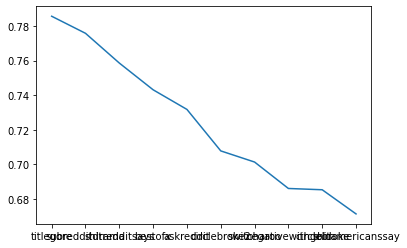

In [86]:
most_similar_title_plot('bestof', 10)

In [67]:
most_similar_overall('audiophile', 10)


overall Positive Similarities
audiophile 1.0000000000000009
umlaudio 0.7241379310344828
bluetooth_audiophile 0.7241379310344828
zeos 0.7241379310344828
sennheiser 0.719243577693953
headphonegore 0.6869775606572686
audiojerk 0.683499170911011
headphonemods 0.6785309724826948
audiophilemusic 0.5120428415488792
diytubes 0.46297731954663374
zreviews 0.43631968442067165

overall Negative Similarities
audiophile 0.9999999999999999
zreviews 0.4472135954999579
linustechtips 0.4472135954999579
iracing 0.4472135954999579
oculusnsfw 0.4472135954999579
stupidcomments 0.4472135954999579
chaoticmonki 0.4472135954999579
devicemodder 0.4472135954999579
borderlessinternet 0.4472135954999579
yahoo 0.4472135954999579
windows10techsupport 0.4472135954999579

overall Sum Similarities
audiophile 0.9999999999999998
umlaudio 0.7351470441147051
bluetooth_audiophile 0.7351470441147051
zeos 0.7351470441147051
sennheiser 0.7216878364870322
headphonegore 0.697421722362825
headphonemods 0.6731911129165357
audiojer

Technology subreddits are related to technology subreddits.  No surprise here.

In [68]:
most_similar_overall('bestof', 10)


overall Positive Similarities
bestof 1.0000000000000664
titlegore 0.7856610941691795
subredditdrama 0.7757884952699804
shitredditsays 0.7585688484146593
bestofx 0.7430871158943632
askreddit 0.7317218910451536
circlebroke2 0.7077170358662244
switcharoo 0.7012626941415063
negativewithgold 0.6859628169838068
circlebroke 0.6852216950699838
shitamericanssay 0.6712349346572092

overall Negative Similarities
bestof 0.9999999999999806
subredditdrama 0.7673020328503986
circlebroke2 0.7248658488778594
shitamericanssay 0.7245899349777801
circlebroke 0.6918281840361827
worstof 0.6741221486406522
askreddit 0.6629122990910421
hailcorporate 0.6627688547991992
changemyview 0.6088630349522124
drama 0.6081926903251285
conspiracy 0.6074470351968989

overall Sum Similarities
bestof 0.999999999999999
titlegore 0.7734658565585298
shitredditsays 0.7257850890802634
askreddit 0.7111934957762555
subredditdrama 0.7110469736365441
switcharoo 0.6832433853739892
circlebroke2 0.6599958023803391
negativewithgold 0.6

# Two-Level cosine similarity

You could also do multi level cosine similarity.  Essentially, you can take the cosine similarities of the most closely related subreddits, and then do a weighted average of the second level cosine simlarities using the first order cosine similarities.  This would probably yield interesting results as well.

In [69]:
def most_similar_level2(index, similarities, all_similarities, n):
  tempsim = similarities
  temp = []

  if len(tempsim) > n+1:
    temp = tempsim[:n+1]
  else:
    temp = tempsim

  if len(temp) > 1:
    del temp[0]

  tempcsr = csr_matrix((1, 67180))
  for row, target, simval in temp:
    templ2 = all_similarities[target,:]
    templ2 = simval * templ2
    tempcsr = tempcsr + templ2
  
  return sort_coo(coo_matrix(tempcsr))

def most_similar_l2(subreddit, n):
  index = name_dict[subreddit]
  ret = most_similar_level2(index, sort_coo(coo_matrix(title_pos_similarities[index,:])), title_pos_similarities, n)
  print('\nTitle Positive L2 Similarities')
  print_ordered(ret, n)
  ret = most_similar_level2(index, sort_coo(coo_matrix(title_neg_similarities[index,:])), title_neg_similarities, n)
  print('\nTitle Negative L2 Similarities')
  print_ordered(ret, n)
  index = name_dict[subreddit]
  ret = most_similar_level2(index, sort_coo(coo_matrix(body_pos_similarities[index,:])), body_pos_similarities, n)
  print('\nBody Positive L2 Similarities')
  print_ordered(ret, n)
  ret = most_similar_level2(index, sort_coo(coo_matrix(body_neg_similarities[index,:])), body_neg_similarities, n)
  print('\nBody Negative L2 Similarities')
  print_ordered(ret, n)

In [70]:
most_similar_l2('todayilearned', 10)


Title Positive L2 Similarities
rekt 7.584071411513256
topcommentoftheday 7.496685455119426
stanisms 7.489966197329456
mostgilded 7.483356909477301
museumofreddit 7.476813404775156
unexpected 7.469055509983657
retiredusername 7.439649881853167
beetlejuicing 7.415826734967048
shittyedits 7.394517896861706
deathclub 7.3884049847917375
bestofreddit 7.3713555832232025

Title Negative L2 Similarities
bestoftldr 7.475609692760652
topcommentoftheday 7.454312345215963
learning2animate 7.449437087067448
justpatriarchythings 7.449437087067448
hspas 7.449437087067448
im14andthisisscary 7.449437087067448
illbleed 7.449437087067448
ihopeyousteponalego 7.449437087067448
pizzaghazi 7.449437087067448
osta1014 7.449437087067448
quotables 7.449437087067448

Body Positive L2 Similarities

Body Negative L2 Similarities


In [71]:
most_similar_title('todayilearned', 10)


Title Positive Similarities
todayilearned 1.000000000000002
mostgilded 0.8736687746573939
museumofreddit 0.8657579401343583
bestofreddit 0.8572044118282093
rekt 0.8556923652466499
beetlejuicing 0.8533605669378973
getmotivated 0.8499661657960971
himym 0.8437467342659353
stanisms 0.8418690619745864
pka 0.839349185810448
deathclub 0.8385967435130857

Title Negative Similarities
todayilearned 0.999999999999999
beetlejuicing 0.8483532151850262
bestoftldr 0.8300442879560048
topcommentoftheday 0.8270710460190414
switcheroo 0.818098035306588
evenwithcontext 0.8071130443825552
whoreddithatesnow 0.7946006132197156
wtfdidijustread 0.7829864903972594
learning2animate 0.7786385727061238
justpatriarchythings 0.7786385727061238
hspas 0.7786385727061238

Title Sum Similarities
todayilearned 0.9999999999999959
mostgilded 0.8459896801799931
museumofreddit 0.8307591936057898
beetlejuicing 0.8247830777855427
bestofreddit 0.8245134781455893
pka 0.8240624562384042
rekt 0.8234832293860749
getmotivated 0.817

Taking the L2 similarities with weighted averages of nodes of distance 2, we can see that it is fairly similar to the immediate neighbor similarities, though there are some differences in both ordering and content.  You could extend this concept to even further neighbor nodes of distance 3 or greater, and implement a recursive function to search in this manner, with decreasing weights.  This would give you potentially more interesting results, at great computational cost.

In [72]:
most_similar_l2('leagueoflegends', 10)


Title Positive L2 Similarities
justzenoththings 5.7142093722407274
linamasterrace 5.7142093722407274
lootmarket 5.7142093722407274
islandd 5.7142093722407274
ihatedragons 5.7142093722407274
onetrueclip 5.7142093722407274
navalwarfare 5.7142093722407274
boinked 5.7142093722407274
busey 5.7142093722407274
amateurdota2league 5.7142093722407274
1308 5.7142093722407274

Title Negative L2 Similarities
dotameme 4.596194077712559
stopdota2 4.596194077712559
whyihatethefrontpage 4.596194077712559
skrid 4.596194077712559
dota2shitpost 4.596194077712559
letsdrownout 4.596194077712559
spiderrights 4.596194077712559
iamveryranked 4.596194077712559
covane 4.596194077712559
ggdota2 4.596194077712559
dota2til 4.596194077712559

Body Positive L2 Similarities
carlboison 7.8454310592639445
allthingsadc 7.8454310592639445
fumus 7.8454310592639445
timergg 7.8454310592639445
skarnermains 7.8454310592639445
shurimaslegacy 7.8454310592639445
blitzmains 7.8454310592639445
xayahmains 7.8454310592639445
6spam 7

In [73]:
most_similar_title('leagueoflegends', 10)


Title Positive Similarities
leagueoflegends 1.000000000000004
thegdstudio 0.5934527418509702
dota2circlejerk 0.5803161846067915
justzenoththings 0.5691151906184531
linamasterrace 0.5691151906184531
lootmarket 0.5691151906184531
islandd 0.5691151906184531
ihatedragons 0.5691151906184531
onetrueclip 0.5691151906184531
navalwarfare 0.5691151906184531
boinked 0.5691151906184531

Title Negative Similarities
leagueoflegends 1.0000000000000002
esportdrama 0.5
dotameme 0.47140452079103173
stopdota2 0.47140452079103173
whyihatethefrontpage 0.47140452079103173
skrid 0.47140452079103173
dota2shitpost 0.47140452079103173
letsdrownout 0.47140452079103173
spiderrights 0.47140452079103173
iamveryranked 0.47140452079103173
covane 0.47140452079103173

Title Sum Similarities
leagueoflegends 0.9999999999999943
thegdstudio 0.5807519557354525
dota2circlejerk 0.5663173157703152
justzenoththings 0.5565752127192172
linamasterrace 0.5565752127192172
lootmarket 0.5565752127192172
islandd 0.5565752127192172
iha

For a slightly more specialized subreddit like leagueoflegends, the related subreddits starts to look a bit more esoteric.  I don't know enough about reddit or league of legends or reddit to know exactly how some of these are related, but clearly there is interesting stuff to sift through if needed.

# Final Points

While we can look at cosine similarities of various derived matrices separately or combined together, there is clearly a lot of overlap between them.  Generally speaking, if a subreddit is referenced a lot in the title, it will likely also be referenced in the text, and any subreddit with a lot of negative references will also generally be popular overall.  The ideal goal would likely be to fine tune a combination of all of these potential similarity metrics to get the most effective combination, but measuring that is only possible on the scale of an actual technology company who are able to test these recommendations over a large active population.  Overall though, this type of graph analysis still falls into the typical issues of cosine similarity and recommender systems, which is that for very unpopular subreddits with few links, it is unlikely that you will recommend them.